# Fit4Function libraries enable more accurate functional screening and prediction for in vitro assays. 



In [1]:
#Setup 

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

from scipy.stats import gaussian_kde, ttest_rel

----------
# Screening replication quality of Fit4Function is better than that of NNK libraries 



In [2]:
# Load Data

# NNK library 
NNK = pd.read_csv('data/nnk_library_invitro.csv')

# Fit4Fxn library 
Fit4Fxn = pd.read_csv('data/fit4function_library_invitro.csv')


In [3]:
# Meta data 
assays =  ['HEK_b','hCMECd3_b','mBMVEC_b','hBMVEC_b','HEK_tr']

assay_titles = [
    'HEK (b)',
    'hCMEC/d3 (b)',
    'mBMVEC (b)',
    'hBMVEC (b)',
    'HEK (tr)']

In [4]:
# Compute correlations

nnk_r = []
hh_r = []

for k in range(len(assays)):
    # NNK
    cols = ['{}_{}'.format(assays[k], r+1) for r in range(3)]
    indices = np.tril_indices(3, k=-1)
    
    for i, j in zip(*indices):
        x = NNK[cols[i]]
        y = NNK[cols[j]]

        remove = ((x == 0) | (y == 0) | np.isnan(x) | np.isnan(y))
        x = np.log2(x[~remove])
        y = np.log2(y[~remove])
        nnk_r.append(np.corrcoef(x, y)[0, 1])
    
    # Fit4Function 
    cols = ['{}_{}'.format(assays[k], r+1) for r in range(3)]
    indices = np.triu_indices(3, k=1)
    
    for i, j in zip(*indices):
        x = Fit4Fxn[cols[i]]
        y = Fit4Fxn[cols[j]]
        
        remove = ((x == 0) | (y == 0) | np.isnan(x) | np.isnan(y) | np.isinf(x) | np.isinf(y)  )
        x = np.log2(x[~remove])
        y = np.log2(y[~remove])
        hh_r.append(np.corrcoef(x, y)[0, 1])
        
# Summary Stats        
nnk_r_avg = np.mean(np.reshape(nnk_r, (5, 3)), axis=1)
hh_r_avg = np.mean(np.reshape(hh_r, (5, 3)), axis=1)

nnk_r_sd = np.std(np.reshape(nnk_r, (5, 3)), axis=1)
hh_r_sd = np.std(np.reshape(hh_r, (5, 3)), axis=1)

replication_stats = pd.DataFrame({'NNK_r_avg': nnk_r_avg, 'NNK_r_sd': nnk_r_sd,
                                  'Fit4Function_r_avg': hh_r_avg, 'Fit4Function_r_sd': hh_r_sd})

#One-tailed paired t-test
t_statistic, p_value = ttest_rel(replication_stats.Fit4Function_r_avg , replication_stats.NNK_r_avg, alternative='two-sided')
print("T-Statistic:", t_statistic)
print("P-Value:", p_value/2)  # Divide p-value by 2 for one-tailed test


# Save results  
replication_stats.to_csv('results/replication_quality_nnk_fit4function.csv')

T-Statistic: 4.238472459437662
P-Value: 0.006639877246630343


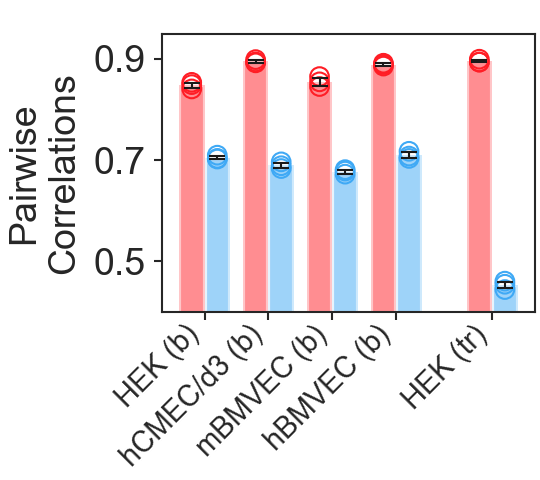

In [5]:
# Figure 

# Figure Configurations 
sns.set_theme(style='ticks', font_scale=0.75, rc={
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans'],
    'svg.fonttype': 'none',
    'text.usetex': False,
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.size': 9,
    'axes.labelsize': 9,
    'axes.titlesize': 9,
    'axes.labelpad': 2,
    'axes.linewidth': 0.5,
    'axes.titlepad': 4,
    'lines.linewidth': 0.5,
    'legend.fontsize': 9,
    'legend.title_fontsize': 9,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'xtick.major.size': 2,
    'xtick.major.pad': 2,
    'xtick.major.width': 0.5,
    'ytick.major.size': 2,
    'ytick.major.pad': 2,
    'ytick.major.width': 0.5,
    'xtick.minor.size': 2,
    'xtick.minor.pad': 2,
    'xtick.minor.width': 0.5,
    'ytick.minor.size': 2,
    'ytick.minor.pad': 1,
    'ytick.minor.width': 0.5,
})


bar_width = 0.4

fig = plt.figure(figsize=(1.8, 1.6), dpi=150)
gs = fig.add_gridspec(
    1, 1,
    wspace=0.3, hspace=0.3, bottom=0.35, top=0.93, left=0.3, right=0.99 
)

x_far = 5.5
x_bar = np.append(np.arange(0, 4) + 1, x_far)
x = np.append(np.repeat(np.arange(0, 4), 3) + 1, np.repeat(x_far, 3))
    
ax = fig.add_subplot(gs[0, 0])

# Bars
ax.bar(
    (x_bar + (bar_width/2)), nnk_r_avg, width=bar_width,
    color='#3FA9F5', label='NNK', alpha=0.5,
)

ax.bar(
    (x_bar - (bar_width/2)), hh_r_avg, width=bar_width,
    color='#FF1D25', label='HH', alpha=0.5,
)

# Error bars 
ax.errorbar(
    (x_bar + (bar_width/2)), nnk_r_avg, yerr=nnk_r_sd, 
    fmt='none', ecolor='k', elinewidth=0.5, 
    capsize=2, capthick=0.5
)
ax.errorbar(
    (x_bar - (bar_width/2)), hh_r_avg, yerr=hh_r_sd, 
    fmt='none', ecolor='k', elinewidth=0.5, 
    capsize=2, capthick=0.5
)

ax.scatter(
    (x + (bar_width / 2)), nnk_r, s=20, marker='o',
    edgecolor='#3FA9F5', facecolor='none', linewidth=0.5
    # rasterized=True
)
ax.scatter(
    (x - (bar_width / 2)), hh_r, s=20, marker='o',
    edgecolor='#FF1D25', facecolor='none', linewidth=0.5
    # rasterized=True
)

# Text 
ax.set_xticks(np.append(np.arange(0, 4)+1, x_far))
ax.set_xticklabels(assay_titles)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')
ax.tick_params(axis='x', pad=0, labelsize=7)

ax.set_yticks([0.5, 0.7, 0.9])
ax.set_ylim([0.4, 0.95])
ax.set_ylabel('Pairwise\nCorrelations', labelpad=3)

# Save and show plot 
filename = 'figures/fig3c_fit4function_replication_quality_invitro'
fig.savefig('{}.png'.format(filename), dpi=300)
fig.savefig('{}_600dpi.svg'.format(filename), dpi=600)
fig.savefig('{}_1200dpi.svg'.format(filename), dpi=1200)
    
plt.close()

Image(filename + '.png')

-----

# Modeling using Fit4Function screening data is more accurate than NNK libraries 



In [6]:
# Data 
#SL: this bypassed the prediction model

# Predictions | Fit4Function library 
Predictions_F4F = pd.ExcelFile('data/fit4function_library_invitro_predictions.xlsx')

# Predictions | NNK library 
Predictions_NNK = pd.ExcelFile('data/nnk_library_invitro_predictions.xlsx')


Assays = ['HEK_b','hCMECd3_b','mBMVEC_b','hBMVEC_b','HEK_tr'];


In [7]:
# Preprocessing 

# Extract prediction data frames 
f4f_test_dfs = {}
nnk_test_dfs = {}

for crnt_assay in Assays: 
    f4f_test_dfs[crnt_assay] = pd.read_excel(Predictions_F4F, crnt_assay)
    nnk_test_dfs[crnt_assay] = pd.read_excel(Predictions_NNK, crnt_assay)    

    
# Precompute Correlations between measured and predicted for each assay-model 
# Fit4Function 
f4f_pred_cors = []
for assay in Assays:
    df = f4f_test_dfs[assay]
    
    # Removing non-detected to avoid processing error in correlation calculations
    df = df.loc[(~df['Measured'].isna()) & (~df['Predicted'].isna()), :]

    f4f_pred_cors.append(np.corrcoef(df['Measured'], df['Predicted'])[0, 1])
print(f4f_pred_cors)

# NNK 
nnk_pred_cors = []
for assay in Assays:
    df = nnk_test_dfs[assay]
    nnk_pred_cors.append(np.corrcoef(df['Measured'], df['Predicted'])[0, 1])

print(nnk_pred_cors)


# Significance of difference in screening quality

#One-tailed paired t-test
t_statistic, p_value = ttest_rel(np.array(f4f_pred_cors) , np.array(nnk_pred_cors), alternative='two-sided')
print("T-Statistic:", t_statistic)
print("P-Value:", p_value/2)  # Divide p-value by 2 for one-tailed test


[0.7438558941277387, 0.8390874121635177, 0.8439143618386842, 0.8190730860821372, 0.8348173689961866]
[0.6722204401553487, 0.6616548424723367, 0.5303770871223291, 0.5052445056258612, 0.3629765048871374]
T-Statistic: 3.9656683225043925
P-Value: 0.008299354807892243


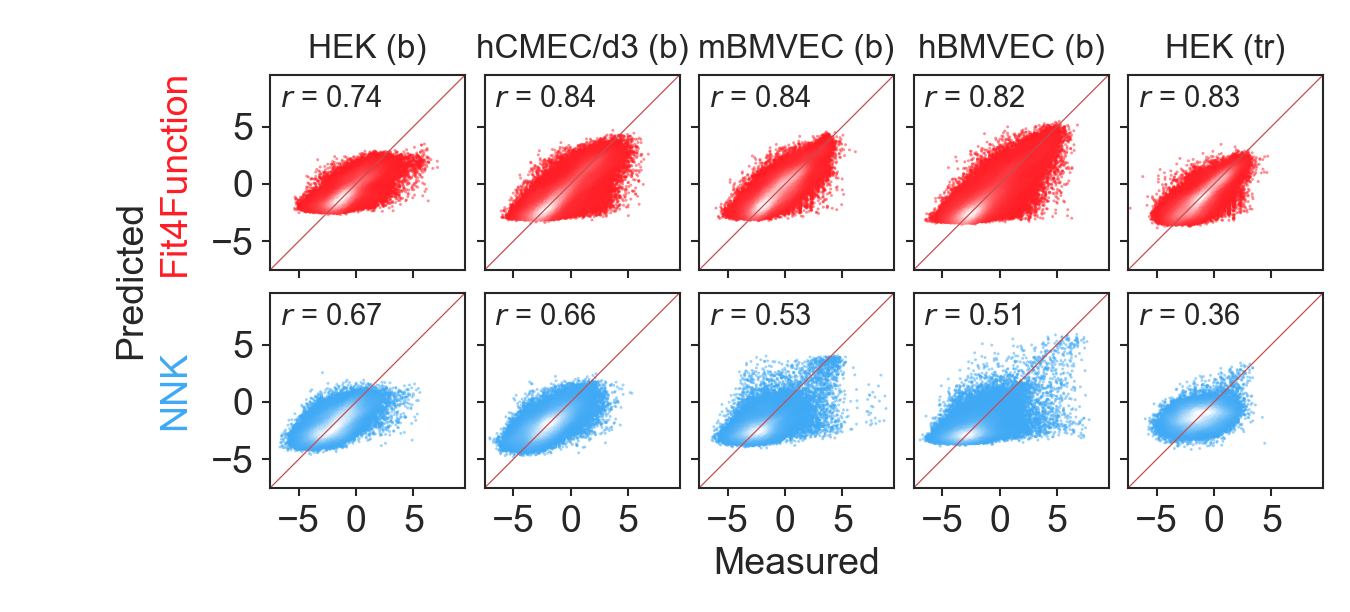

In [8]:
# Figure

# Precompute densities
nnk_assays = Assays.copy()
F4F_assays = Assays.copy()
all_assays = (nnk_assays, F4F_assays)
df_list = [f4f_test_dfs, nnk_test_dfs]
cs = []
for k in range(2):
    _cs = []
    assays = all_assays[k]
    for i, assay in enumerate(assays):
        #print(k, i)
        df = df_list[k][assay]

        x = df['Measured']
        y = df['Predicted']
        
        # Removing non-detected to avoid processing error in gaussian_kde
        remove = np.isinf(x) | np.isinf(y) | np.isnan(x) | np.isnan(y)
        x = x[~remove]
        y = y[~remove]
        
        kernel = gaussian_kde(np.vstack([
            x.sample(n=1000, random_state=1),
            y.sample(n=1000, random_state=1)
        ]))
        c = kernel(np.vstack([x, y]))
        _cs.append(c)
    cs.append(_cs)
    

# Figure Configurations 

sns.set_theme(style='ticks', font_scale=0.75, rc={
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans'],
    'svg.fonttype': 'none',
    'text.usetex': False,
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.size': 9,
    'axes.labelsize': 9,
    'axes.titlesize': 9,
    'axes.labelpad': 2,
    'axes.linewidth': 0.5,
    'axes.titlepad': 4,
    'lines.linewidth': 0.5,
    'legend.fontsize': 9,
    'legend.title_fontsize': 9,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'xtick.major.size': 2,
    'xtick.major.pad': 2,
    'xtick.major.width': 0.5,
    'ytick.major.size': 2,
    'ytick.major.pad': 2,
    'ytick.major.width': 0.5,
    'xtick.minor.size': 2,
    'xtick.minor.pad': 2,
    'xtick.minor.width': 0.5,
    'ytick.minor.size': 2,
    'ytick.minor.pad': 1,
    'ytick.minor.width': 0.5,
})


xlim = [-7.5, 9.5]
ylim = xlim
xticks = [-5, 0, 5]
yticks = xticks
pt_size = 0.5
cmap = mpl.cm.inferno

fig = plt.figure(figsize=(3.75*1.2, 1.7*1.2), dpi=150)

gs = mpl.gridspec.GridSpec(1, 1, hspace=0.5, figure=fig,
    left=0.2, right=0.98, top=0.88, bottom=0.2)
gs_scatter = mpl.gridspec.GridSpecFromSubplotSpec(2, 5, subplot_spec=gs[0, 0], hspace=0.1, wspace=0.1)


# Titles
col_titles=[ 'Fit4Function', 'NNK']
titles = [
    'HEK (b)',
    'hCMEC/d3 (b)',
    'mBMVEC (b)',
    'hBMVEC (b)',
    'HEK (tr)',
]

# cmaps = [mpl.cm.Blues_r, mpl.cm.Reds_r]
cmaps = [mpl.colors.LinearSegmentedColormap.from_list('rw', colors=['#FF1D25', '#FFFFFF']),
    mpl.colors.LinearSegmentedColormap.from_list('rw', colors=['#3FA9F5', '#FFFFFF'])]

df_list = (f4f_test_dfs , nnk_test_dfs)


# Plot 

# Column 2: NNK
# Column 1: Fit4Function 
for k in range(2):
    assays = all_assays[k]

    for i, assay in enumerate(assays):
        ax = fig.add_subplot(gs_scatter[k, i])
        ax.set_xlim(xlim); ax.set_ylim(ylim)
        ax.set_aspect('equal', 'box')

        df = df_list[k][assay]

        x = df['Measured']
        y = df['Predicted']
        
        
        # Removing non-detected to avoid processing error in gaussian_kde
        remove = np.isinf(x) | np.isinf(y) | np.isnan(x) | np.isnan(y)
        x = x[~remove]
        y = y[~remove]


        ax.scatter(
            x, y, c=cs[k][i], s=pt_size, cmap=cmaps[k], alpha=0.5,
            rasterized=True, linewidth=0, edgecolors=None
        )
        ax.plot(xlim, ylim, '-r', linewidth=0.3)

        ax.set_xticks(xticks); 
        ax.set_yticks(yticks)    
        
        if i > 0:
            ax.set_yticklabels([])
        if i == 0 and k == 0:
            ax.set_ylabel('Predicted', y=-0.05, ha='center', labelpad=15)
            
        if i == 0:
            ax.text(-0.4, 0.5, col_titles[k],
                   transform=ax.transAxes, ha='right', va='center', rotation=90,
                   color='#FF1D25'  if k == 0 else '#3FA9F5')
            
        if k == 0:
            ax.set_xticklabels([])
            ax.set_title(titles[i], fontsize=8) 
        
        if k == 1 and i == 2:
            ax.set_xlabel('Measured')
            

        # Correlation text
        ax.text(
            x=0.05, y=0.95, transform=ax.transAxes,
            s=r'$r$ = {:.2f}'.format(np.corrcoef(x, y)[0, 1]), 
            ha='left', va='top',# backgroundcolor='w'
            fontsize=7
        )

# Show and save
filename = 'figures/fig3d_fit4function_prediction_quality_invitro'
fig.savefig('{}.png'.format(filename), dpi=300)
fig.savefig('{}_600dpi.svg'.format(filename), dpi=600)
fig.savefig('{}_1200dpi.svg'.format(filename), dpi=1200)

plt.close()

Image(filename + '.png')
